# Joint state analysis
<font size="3"> Comparison between reference values of HTC Valve trackers and the calculated values of Cardsflow </font>

In [32]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [71]:
# in case not installed
#!pip install sklearn
#!pip install matplotlib
#!pip install ipywidgets jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib
import matplotlib.pyplot as plt

In [42]:
# load dataset generated from the script write_data_from_rosbag_HTC_Cardsflow.py ...
# which took data from rosbag recording
dataset = pd.read_csv('/home/niels/Documents/Roboy/joint_state_analysis/data/2021_05_25_right_shoulder_60min_wdisp.log',delim_whitespace=True, header=0)

In [43]:
dataset = dataset.dropna()                                             # remove nan rows
dataset['roll_error'] = dataset['roll_htc']-dataset['roll_cf']     # error_roll
dataset['pitch_error'] = dataset['pitch_htc']-dataset['pitch_cf'] # error_pitch
dataset['yaw_error'] = dataset['yaw_htc']-dataset['yaw_cf']         # error_yaw

# also put limits on HTC_tracker joint values
# limit shoulder_right_axis0 (roll)  lower="-1.0" upper="0.3"
# limit shoulder_right_axis1 (pitch) lower="-1.2" upper="0.0"
# limit shoulder_right_axis2 (yaw)   lower="-0.1" upper="0.1"
dataset['roll_clamped'] = dataset['roll_htc'].clip(upper=0.3, lower=-1.0)
dataset['pitch_clamped'] = dataset['pitch_htc'].clip(upper=0.0, lower=-1.2)
dataset['yaw_clamped'] = dataset['yaw_htc'].clip(upper=0.1, lower=-0.1)


dataset['roll_error_cl'] = dataset['roll_clamped']-dataset['roll_cf']    # error_roll
dataset['pitch_error_cl'] = dataset['pitch_clamped']-dataset['pitch_cf'] # error_pitch
dataset['yaw_error_cl'] = dataset['yaw_clamped']-dataset['yaw_cf']       # error_yaw

# turn values around for # mp0-mp3 * -1 # mp12-mp15 * -1 (in original data e.g. m_p0 has switched values in comparison to m_e0)
dataset['m_p0'] = dataset['m_p0']*(-1) 
dataset['m_p1'] = dataset['m_p1']*(-1)
dataset['m_p2'] = dataset['m_p2']*(-1) 
dataset['m_p3'] = dataset['m_p3']*(-1) 

dataset['m_p12'] = dataset['m_p12']*(-1) 
dataset['m_p13'] = dataset['m_p13']*(-1)
dataset['m_p14'] = dataset['m_p14']*(-1) 
dataset['m_p15'] = dataset['m_p15']*(-1)

dataset

,roll_htc,pitch_htc,yaw_htc,roll_cf,pitch_cf,yaw_cf,m_p0,m_p1,m_p2,m_p3,...,m_d15,roll_error,pitch_error,yaw_error,roll_clamped,pitch_clamped,yaw_clamped,roll_error_cl,pitch_error_cl,yaw_error_cl
0,-0.091951,-0.138378,0.055479,0.000354,-2.979948e-08,-0.000026,-0.000000,-0.000000,-0.000000,-0.000000,...,-14.0,-0.092305,-0.138378,0.055505,-0.091951,-0.138378,0.055479,-0.092305,-0.138378,0.055505
1,-0.091659,-0.138016,0.055642,0.000355,-2.597291e-08,-0.000026,-0.000000,-0.000000,-0.000000,-0.000000,...,-14.0,-0.092014,-0.138016,0.055668,-0.091659,-0.138016,0.055642,-0.092014,-0.138016,0.055668
2,-0.091894,-0.138182,0.055799,0.000355,-2.352533e-08,-0.000026,-0.000000,-0.000000,-0.000000,-0.000000,...,-14.0,-0.092249,-0.138182,0.055824,-0.091894,-0.138182,0.055799,-0.092249,-0.138182,0.055824
3,-0.091965,-0.138307,0.055540,0.000355,-2.190537e-08,-0.000026,-0.000000,-0.000000,-0.000000,-0.000000,...,-14.0,-0.092320,-0.138307,0.055566,-0.091965,-0.138307,0.055540,-0.092320,-0.138307,0.055566
4,-0.091688,-0.138815,0.055304,0.000355,-2.088005e-08,-0.000026,-0.000000,-0.000000,-0.000000,-0.000000,...,-14.0,-0.092044,-0.138815,0.055330,-0.091688,-0.138815,0.055304,-0.092044,-0.138815,0.055330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81535,0.278417,-0.667827,0.145461,0.300000,-5.833884e-01,0.038639,0.021162,0.018893,0.015327,0.022094,...,-33.0,-0.021583,-0.084438,0.106822,0.278417,-0.667827,0.100000,-0.021583,-0.084438,0.061361
81536,0.278217,-0.667371,0.144723,0.300000,-5.833883e-01,0.038639,0.021162,0.018893,0.015327,0.022094,...,-33.0,-0.021783,-0.083983,0.106085,0.278217,-0.667371,0.100000,-0.021783,-0.083983,0.061361
81537,0.278143,-0.667397,0.144754,0.300000,-5.833881e-01,0.038639,0.021162,0.018893,0.015327,0.022094,...,-33.0,-0.021857,-0.084009,0.106115,0.278143,-0.667397,0.100000,-0.021857,-0.084009,0.061361
81538,0.278228,-0.667307,0.144932,0.300000,-5.833879e-01,0.038639,0.021162,0.018893,0.015327,0.022094,...,-33.0,-0.021772,-0.083919,0.106293,0.278228,-0.667307,0.100000,-0.021772,-0.083919,0.061361


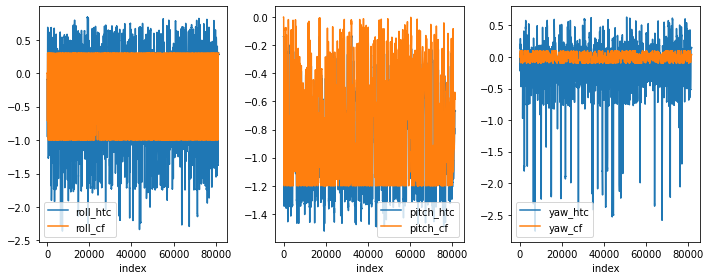

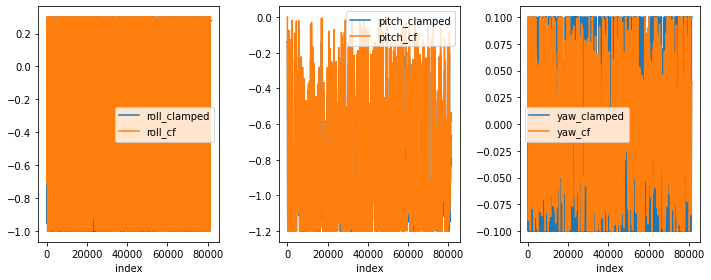

In [44]:
# all the dataset
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns


dataset.reset_index().plot(x='index', y=["roll_htc", "roll_cf"], ax=ax1)   # plot all data points of roll (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["pitch_htc", "pitch_cf"], ax=ax2) # plot all data points of pitch (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["yaw_htc", "yaw_cf"], ax=ax3)     # plot all data points of yaw (HTC and Cardsflow)
plt.tight_layout()  # Optional ... often improves the layout

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
dataset.reset_index().plot(x='index', y=["roll_clamped", "roll_cf"], ax=ax1)   # plot all data points of roll (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["pitch_clamped", "pitch_cf"], ax=ax2) # plot all data points of pitch (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["yaw_clamped", "yaw_cf"], ax=ax3)     # plot all data points of yaw (HTC and Cardsflow)
plt.tight_layout()  # Optional ... often improves the layout 

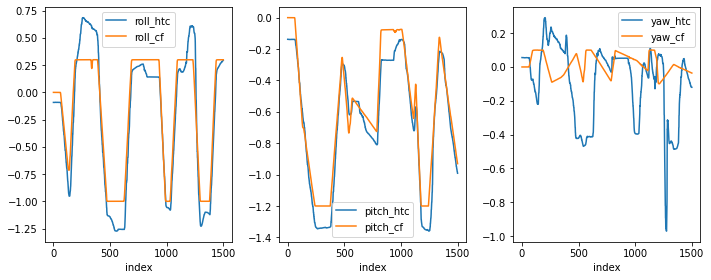

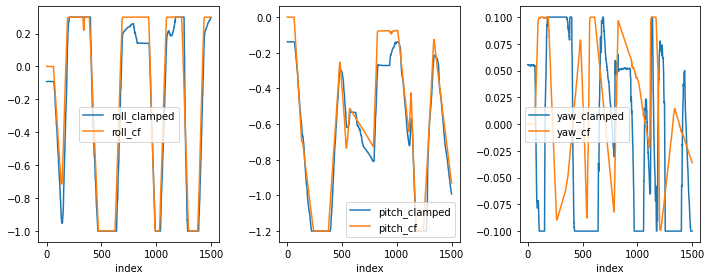

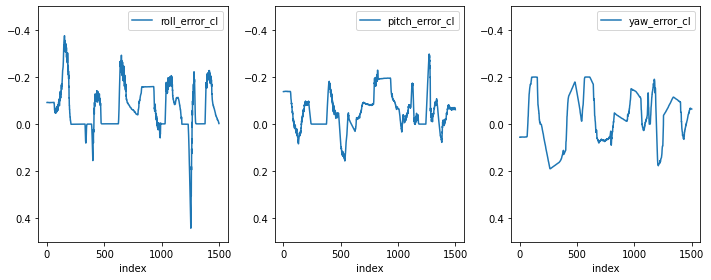

In [45]:
# plot detailed view of specified interval
specific_interval = dataset[1:1500] # set interval to your needs


#plot comparison withOUT clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y=["roll_htc", "roll_cf"], ax=ax1)
specific_interval.reset_index().plot(x='index', y=["pitch_htc", "pitch_cf"], ax=ax2)
specific_interval.reset_index().plot(x='index', y=["yaw_htc", "yaw_cf"],ax=ax3)       
plt.tight_layout()  # Optional ... often improves the layout 

#plot comparison with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y=["roll_clamped", "roll_cf"], ax=ax1)
specific_interval.reset_index().plot(x='index', y=["pitch_clamped", "pitch_cf"], ax=ax2)
specific_interval.reset_index().plot(x='index', y=["yaw_clamped", "yaw_cf"],ax=ax3)
plt.tight_layout()  # Optional ... often improves the layout 

# plot error with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y='roll_error_cl', ax=ax1, ylim=(0.5,-0.5)) # plot roll_error
specific_interval.reset_index().plot(x='index', y='pitch_error_cl', ax=ax2, ylim=(0.5,-0.5)) # plot pitch_error
specific_interval.reset_index().plot(x='index', y='yaw_error_cl', ax=ax3, ylim=(0.5,-0.5)) # plot yaw_error
plt.tight_layout()  # Optional ... often improves the layout 

In [46]:
#mean
mean_roll = dataset['roll_error_cl'].mean()
mean_pitch = dataset['pitch_error_cl'].mean() 
mean_yaw = dataset['yaw_error_cl'].mean() 

#standard deviation 
std_roll = dataset['roll_error_cl'].std()
std_pitch = dataset['pitch_error_cl'].std() 
std_yaw = dataset['yaw_error_cl'].std()

#Mean squarred Error Calculations
roll_ref_cl = dataset[['roll_clamped']]
pitch_ref_cl = dataset[['pitch_clamped']]
yaw_ref_cl = dataset[['yaw_clamped']]

roll_cf = dataset[['roll_cf']]
pitch_cf = dataset[['pitch_cf']]
yaw_cf = dataset[['yaw_cf']]

roll_rms = np.sqrt(mean_squared_error(roll_ref_cl, roll_cf))     # mean squarred error roll
pitch_rms = np.sqrt(mean_squared_error(pitch_ref_cl, pitch_cf))  # mean squarred error pitch
yaw_rms = np.sqrt(mean_squared_error(yaw_ref_cl, yaw_cf))        # mean squarred error yaw

print("mean_roll_error:  ", round(mean_roll,4), "std_roll_error:  ", round(std_roll,3), "roll_rms:  ", round(roll_rms,3))
print("mean_pitch_error: ", round(mean_pitch,4), "std_pitch_error: ", round(std_pitch,3), "pitch_rms: ",round(pitch_rms,3))
print("mean_yaw_error:   ", round(mean_yaw,4), "std_yaw_error:   ", round(std_yaw,3), "yaw_rms:   ",round(yaw_rms,3))

mean_roll_error:   -0.0408 std_roll_error:   0.108 roll_rms:   0.116
mean_pitch_error:  -0.0446 std_pitch_error:  0.082 pitch_rms:  0.094
mean_yaw_error:    -0.0258 std_yaw_error:    0.094 yaw_rms:    0.097


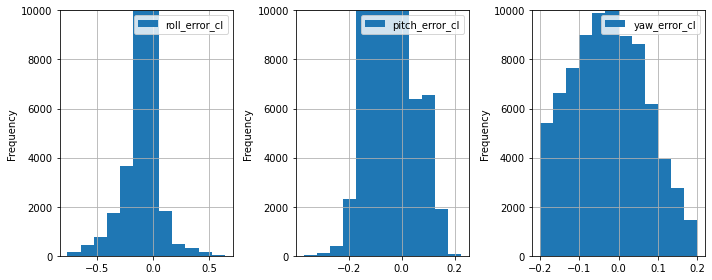

In [47]:
# determine how often which error amount occours
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
ylim_val=(0,10000)
dataset['roll_error_cl'].plot.hist(bins=12, grid=True, legend=True,ax =ax1, ylim=ylim_val)
dataset['pitch_error_cl'].plot.hist(bins=12, grid=True, legend=True,ax =ax2, ylim=ylim_val)
dataset['yaw_error_cl'].plot.hist(bins=12, grid=True, legend=True,ax =ax3, ylim=ylim_val)
plt.tight_layout()  # Optional ... often improves the layout 


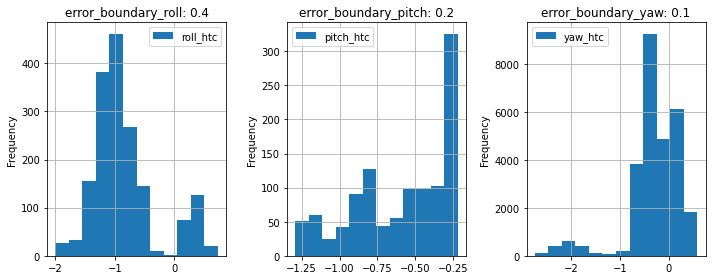

In [48]:
# determine joint angles where |roll_error_cl| > x

 # set error amount boundary for each joint
error_boundary_roll = 0.4
error_boundary_pitch = 0.2
error_boundary_yaw = 0.1

dataset['roll_error_>x'] = ((dataset.roll_error_cl>error_boundary_roll) | (dataset.roll_error_cl< -error_boundary_roll))
dataset['pitch_error_>x'] = ((dataset.pitch_error_cl>error_boundary_pitch) | (dataset.pitch_error_cl< -error_boundary_pitch))
dataset['yaw_error_>x'] = ((dataset.yaw_error_cl>error_boundary_yaw) | (dataset.yaw_error_cl< -error_boundary_yaw))
dataset1=dataset.loc[dataset['roll_error_>x'] == True]
dataset2=dataset.loc[dataset['pitch_error_>x'] == True]
dataset3=dataset.loc[dataset['yaw_error_>x'] == True]

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
dataset1['roll_htc'].plot.hist(bins=12, grid=True, legend=True,ax =ax1, title=f"error_boundary_roll: {error_boundary_roll}")
dataset2['pitch_htc'].plot.hist(bins=12, grid=True, legend=True,ax =ax2, title=f"error_boundary_pitch: {error_boundary_pitch}")
dataset3['yaw_htc'].plot.hist(bins=12, grid=True, legend=True,ax =ax3, title=f"error_boundary_yaw: {error_boundary_yaw}")
plt.tight_layout()  # Optional ... often improves the layout 

## Motor position and encoder comparison

In [49]:
for i in range(16):
    dataset['m'+str(i)+'_error'] = dataset['m_p'+str(i)]-dataset['m_e'+str(i)] 

<AxesSubplot:xlabel='index'>

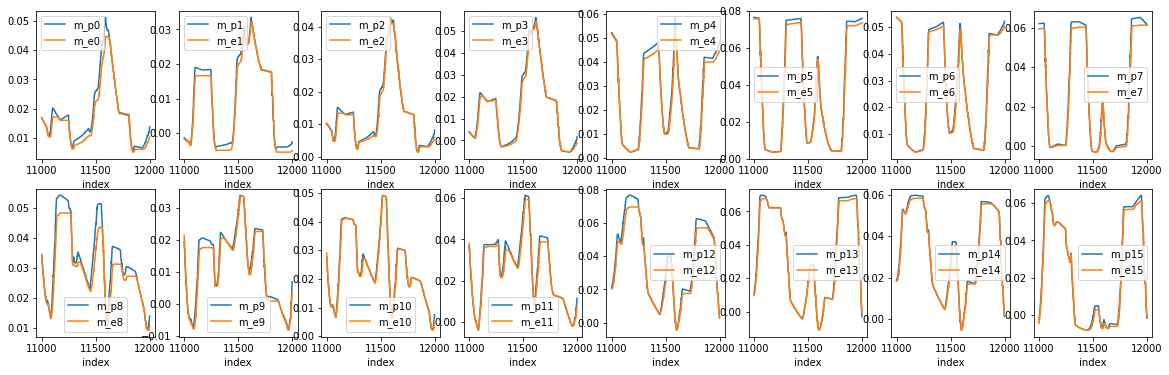

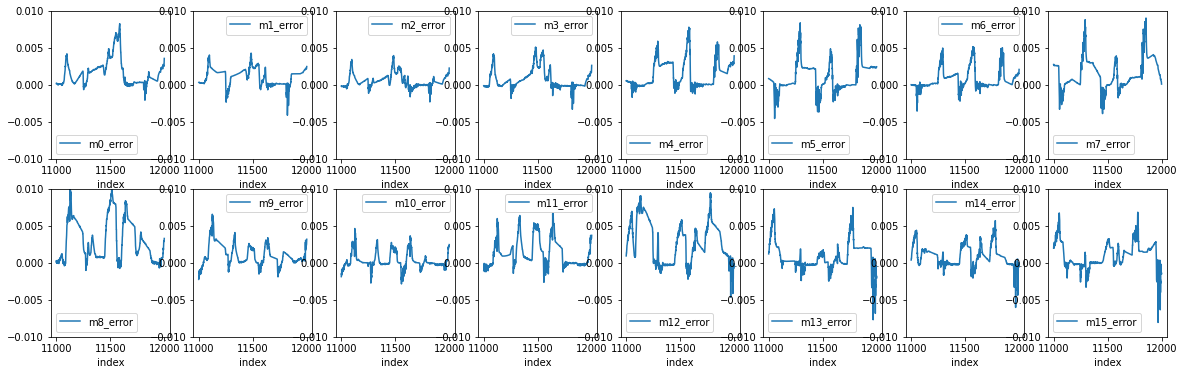

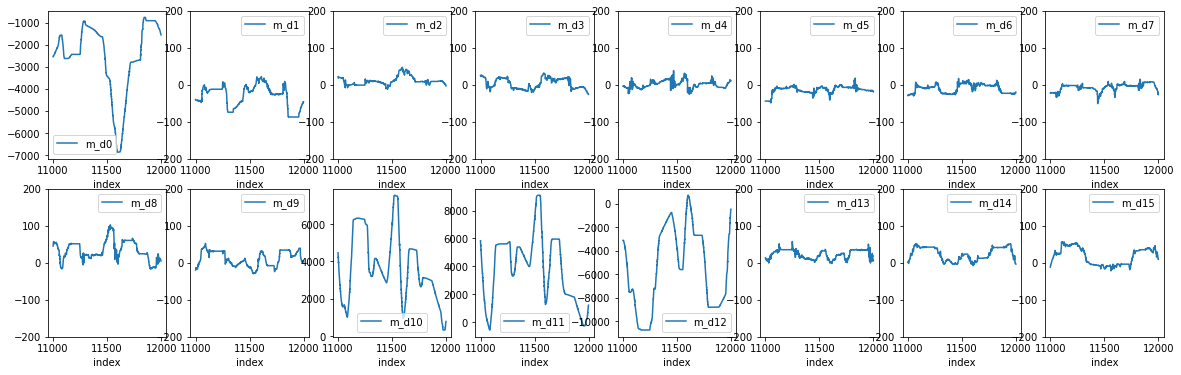

In [56]:


# plot detailed view of specified interval
specific_interval = dataset[11000:12000] # set interval to your needs

no_motors = 56
columns = 8
rows = int(no_motors/columns)

#plot comparison
fig, ((ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15)) = plt.subplots(2,8, figsize=(20,6))  # 1 row, 3 columns


specific_interval.reset_index().plot(x='index', y=["m_p0", "m_e0"], ax=ax0)
specific_interval.reset_index().plot(x='index', y=["m_p1", "m_e1"], ax=ax1)
specific_interval.reset_index().plot(x='index', y=["m_p2", "m_e2"], ax=ax2)
specific_interval.reset_index().plot(x='index', y=["m_p3", "m_e3"], ax=ax3)
specific_interval.reset_index().plot(x='index', y=["m_p4", "m_e4"], ax=ax4)
specific_interval.reset_index().plot(x='index', y=["m_p5", "m_e5"], ax=ax5) 
specific_interval.reset_index().plot(x='index', y=["m_p6", "m_e6"], ax=ax6)
specific_interval.reset_index().plot(x='index', y=["m_p7", "m_e7"], ax=ax7)
specific_interval.reset_index().plot(x='index', y=["m_p8", "m_e8"], ax=ax8)
specific_interval.reset_index().plot(x='index', y=["m_p9", "m_e9"], ax=ax9)
specific_interval.reset_index().plot(x='index', y=["m_p10", "m_e10"], ax=ax10)
specific_interval.reset_index().plot(x='index', y=["m_p11", "m_e11"], ax=ax11)
specific_interval.reset_index().plot(x='index', y=["m_p12", "m_e12"], ax=ax12)
specific_interval.reset_index().plot(x='index', y=["m_p13", "m_e13"], ax=ax13) 
specific_interval.reset_index().plot(x='index', y=["m_p14", "m_e14"], ax=ax14)
specific_interval.reset_index().plot(x='index', y=["m_p15", "m_e15"], ax=ax15) 
#plt.tight_layout()  # Optional ... often improves the layout 

#plot error
ylim_val = (-0.01,0.01)
fig, ((ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15)) = plt.subplots(2,8, figsize=(20,6))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y=['m0_error'], ax=ax0, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m1_error'], ax=ax1, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m2_error'], ax=ax2, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m3_error'], ax=ax3, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m4_error'], ax=ax4, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m5_error'], ax=ax5, ylim=ylim_val) 
specific_interval.reset_index().plot(x='index', y=['m6_error'], ax=ax6, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m7_error'], ax=ax7, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m8_error'], ax=ax8, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m9_error'], ax=ax9, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m10_error'], ax=ax10, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m11_error'], ax=ax11, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m12_error'], ax=ax12, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m13_error'], ax=ax13, ylim=ylim_val) 
specific_interval.reset_index().plot(x='index', y=['m14_error'], ax=ax14, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m15_error'], ax=ax15, ylim=ylim_val) 
#plt.tight_layout()  # Optional ... often improves the layout 

#plot displacement
ylim_val_d = (-200,200)
fig, ((ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15)) = plt.subplots(2,8, figsize=(20,6))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y=['m_d0'], ax=ax0)
specific_interval.reset_index().plot(x='index', y=['m_d1'], ax=ax1, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d2'], ax=ax2, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d3'], ax=ax3, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d4'], ax=ax4, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d5'], ax=ax5, ylim=ylim_val_d) 
specific_interval.reset_index().plot(x='index', y=['m_d6'], ax=ax6, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d7'], ax=ax7, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d8'], ax=ax8, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d9'], ax=ax9, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d10'], ax=ax10)
specific_interval.reset_index().plot(x='index', y=['m_d11'], ax=ax11)
specific_interval.reset_index().plot(x='index', y=['m_d12'], ax=ax12)
specific_interval.reset_index().plot(x='index', y=['m_d13'], ax=ax13, ylim=ylim_val_d) 
specific_interval.reset_index().plot(x='index', y=['m_d14'], ax=ax14, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d15'], ax=ax15, ylim=ylim_val_d) 
#plt.tight_layout()  # Optional ... often improves the layout 

## motor ids: left shoulder 0-7; right shoulder 8-15

In [57]:
#TODO

#mean
mean_list = []
for i in range(15):
    name = "m"+str(i)+"_error"
    mean_list.append(dataset[name].mean())
print("mean_list: \n",mean_list)

#standard deviation 
std_list = []
for i in range(15):
    name = "m"+str(i)+"_error"
    std_list.append(dataset[name].std())
print("std_list: \n", std_list)

#Mean squarred Error Calculations
m_p_list = []
for i in range(15):
    name = "m_p"+str(i)
    m_p_list.append(dataset[name])

m_e_list = []
for i in range(15):
    name = "m_e"+str(i)
    m_e_list.append(dataset[name])    

#m_e20 = dataset[['m_e20']]

rms_list = []
for i in range(15):
    name_p = "m_p"+str(i)
    name_e = "m_e"+str(i)
    rms_list.append(np.sqrt(mean_squared_error(m_p_list[i], m_e_list[i])))  # TODO should be bigger for some motors
print("rms_list: \n", rms_list)
#m20_rms = np.sqrt(mean_squared_error(m_p20, m_e20))        # mean squarred error yaw

m_d_mean_list = []
for i in range(15):
    name = "m_d"+str(i)
    m_d_mean_list.append(dataset[name].mean())  
print("mean_disp_list: \n", m_d_list)

m_d_std_list = []
for i in range(15):
    name = "m_d"+str(i)
    m_d_std_list.append(dataset[name].std())  
print("std_disp_list: \n", m_d_std_list)

mean_list: 
 [-0.002906444524773011, 0.006474490674007599, -0.004890269790685046, 0.006337424158226188, 0.0072393765024849855, -0.004897877654146816, 0.0063015556976202276, -0.004463525193072691, 0.008701359187274002, 0.006539939930618637, 0.005890497719513346, 0.006950599964030843, -0.003140603492815251, -0.004751752821436971, -0.004657289234128427]
std_list: 
 [0.16547228855229434, 0.16486312420208807, 0.16528559165162357, 0.16484378902076305, 0.16480114901219037, 0.1655761865123978, 0.16480728716215867, 0.1654837167271443, 0.1637085592456873, 0.16472726471614793, 0.16401429206423251, 0.16415421181389653, 0.1673399130026443, 0.16722556892459325, 0.16702279746595616]
rms_list: 
 [0.16549679724746388, 0.16498919788783326, 0.16535690643038423, 0.1649645551940615, 0.16495906827742696, 0.1656475973998458, 0.16492670614616103, 0.16554288783651466, 0.16393863895653876, 0.16485602740823035, 0.16411903014836976, 0.16430029100735832, 0.16736835558679555, 0.16729204136476322, 0.1670866933496610